## Final Project Submission

Please fill out:
* Student name: Raye Yoo (Hyoungsin Yoo)
* Student pace: Data Analysis Part Time
* Scheduled project review date/time: 14 May 2023, 23:59
* Instructor name: Hardik Idnani


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1=pd.read_csv('zippedData/bom.movie_gross.csv.gz') # 1st file to import
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#fill the nan values with 0
df1['foreign_gross'] = df1['foreign_gross'].fillna(0)
df1['domestic_gross'] = df1['domestic_gross'].fillna(0)

In [4]:
#update the gross data type to float to calulate
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'],errors='coerce')
df1['domestic_gross'] = pd.to_numeric(df1['domestic_gross'],errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [5]:
#Create a new column of total gross combining domestic gross and foreign gross
df1['total_gross']=df1['domestic_gross'] + df1['foreign_gross']
df1.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [6]:
#re-order the rows by total gross
df1.sort_values(by=['total_gross'], ascending=False).head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


In [7]:
#grouping the grosses by year to create plots
st_plot_1 = df1.groupby(['year'])['domestic_gross'].sum()
st_plot_2 = df1.groupby(['year'])['foreign_gross'].sum()
st_plot_3 = df1.groupby(['year'])['total_gross'].sum()

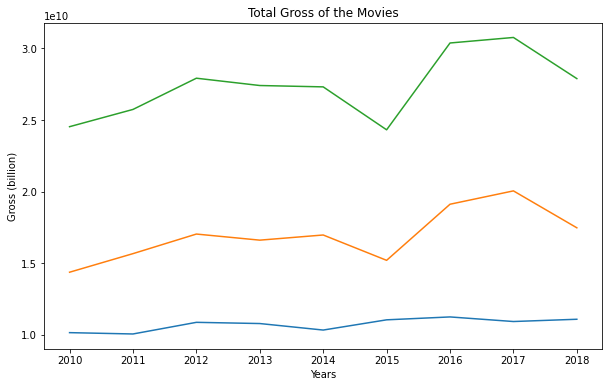

In [8]:
Years = [2010,2011,2012,2013,2014,2015,2016,2017,2018]

plt.figure(figsize = (10, 6))

plt.plot(Years, st_plot_1, label = "Domestic Gross")
plt.plot(Years, st_plot_2, label = "Foreign Gross")
plt.plot(Years, st_plot_3, label = "Total Gross")


plt.xlabel("Years")
plt.ylabel("Gross (billion)")
plt.title("Total Gross of the Movies")
plt.show();

#drop this plot as there is no significant findings

In [9]:
studio = df1['studio']
len(studio.unique())

258

In [10]:
#studio gross by the studio top 10
studio_frequence = df1.groupby(['studio'])['total_gross'].sum()
studio_frequence.sort_values(ascending=False).head(10)
#drop

studio
BV         4.259738e+10
Fox        3.100537e+10
WB         3.083595e+10
Uni.       2.852586e+10
Sony       2.240504e+10
Par.       1.954926e+10
WB (NL)    1.033470e+10
LGF        8.601583e+09
LG/S       5.431924e+09
P/DW       5.076500e+09
Name: total_gross, dtype: float64

In [11]:
# 2nd file to import
df2=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
# 3 to use for data analysis
df3=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
#combining df2 and df3 with the first (common) column
merged_df = pd.merge (df2, df3, how="left", on=["tconst"])

In [14]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [15]:
#find out the top rated movies
merged_df.sort_values(by='averagerating', ascending=False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
87675,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7.0
120584,tt7259300,Calamity Kevin,Calamity Kevin,2019,77.0,"Adventure,Comedy",10.0,6.0
136750,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5.0
144763,tt9715646,Renegade,Renegade,2019,NaN,Documentary,10.0,20.0
120109,tt7227500,Ellis Island: The Making of a Master Race in A...,Ellis Island: The Making of a Master Race in A...,2018,70.0,"Documentary,History",10.0,6.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN


In [16]:
#drop the rows with the average rating nan
merged_df=merged_df.dropna(subset=['averagerating','numvotes'])
merged_df=merged_df.dropna(subset=['runtime_minutes'])
merged_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
...,...,...,...,...,...,...,...,...
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0
146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5.0
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0


In [17]:
#find out the top 25% rated score
top_25 = merged_df['averagerating'].quantile(q=0.75)
top_25

7.3

In [18]:
#filter by the 25% rating and avove
merged_df_filtered = merged_df[merged_df['averagerating'] >= 7.3] 
merged_df_filtered

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53.0
14,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6.0
15,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584.0
18,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8.0
...,...,...,...,...,...,...,...,...
146070,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600.0
146071,tt9905476,Hand Rolled,Hand Rolled,2019,90.0,Documentary,9.3,13.0
146078,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8.0
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0


In [19]:
# remove outliers of the runtime
q_low = merged_df_filtered["runtime_minutes"].quantile(0.01)
q_hi  = merged_df_filtered["runtime_minutes"].quantile(0.99)
merged_df_filtered_outlier = merged_df_filtered[(merged_df_filtered["runtime_minutes"] < q_hi) 
                                                & (merged_df_filtered["runtime_minutes"] > q_low)]

In [20]:
merged_df_filtered_outlier

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
14,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6.0
15,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584.0
18,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8.0
24,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,Documentary,7.8,22.0
...,...,...,...,...,...,...,...,...
146070,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600.0
146071,tt9905476,Hand Rolled,Hand Rolled,2019,90.0,Documentary,9.3,13.0
146078,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8.0
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0


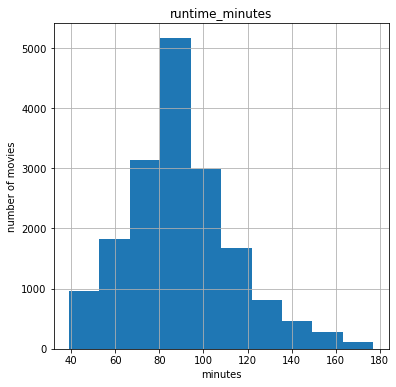

In [21]:
# Top 25% movies' runtime without outliers
merged_df_filtered_outlier.hist(column='runtime_minutes', figsize=(6,6))
plt.xlabel("minutes")
plt.ylabel("number of movies")
plt.savefig("runtime_hist.png");

In [22]:
#find out the number of movies that fall under runtime 80-100min
len(merged_df_filtered_outlier[merged_df_filtered_outlier['runtime_minutes'].between(80, 101)])

7643

In [23]:
#find out the percentages
7643/len(merged_df_filtered_outlier['runtime_minutes'])*100

43.83208120662958

In [24]:
#find out correlation bwteen average rating and voting
#the answer is no..
merged_df_filtered_outlier['averagerating'].corr(merged_df_filtered_outlier['numvotes'])

-0.03820666450492297

In [25]:
#find out Genres of the top 25% movies
genres = merged_df_filtered_outlier['genres']
genres_frequence = genres.value_counts()
genres_frequence.head(10)

Documentary                      4698
Drama                            2357
Comedy                            702
Comedy,Drama                      530
Documentary,Music                 326
Biography,Documentary             325
Documentary,Drama                 308
Biography,Documentary,History     277
Documentary,History               272
Drama,Romance                     258
Name: genres, dtype: int64

In [26]:
genres.describe()

count           17294
unique            585
top       Documentary
freq             4698
Name: genres, dtype: object

In [27]:
#split the genres and count the items individually
genres = genres.str.split(',').str[0]
genres_counts = genres.value_counts().rename_axis('Genres').reset_index(name='Counts')
genres_counts

,Genres,Counts
0,Documentary,6692
1,Drama,3545
2,Comedy,2229
3,Biography,1547
4,Action,1029
5,Adventure,666
6,Crime,474
7,Animation,227
8,Thriller,181
9,Horror,168


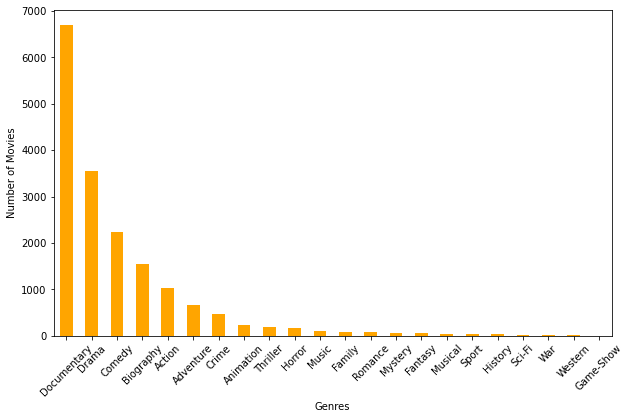

In [28]:
#Visualise the data
genres_counts.plot.bar(x='Genres',
                       y='Counts', 
                       rot=0,
                       figsize=(10,6),
                      legend=None,
                      color = 'orange')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.savefig("Genres_count.png");

In [29]:
#import 4th data
df4=pd.read_csv('zippedData/tmdb.movies.csv.gz')
df4.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [30]:
#sort the rows by the popurlarity
#Top 10 are all franchise movies
df4.sort_values(by=['popularity'], ascending=False).head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [31]:
#find out correlation bwteen average rating and voting
#yeah kind of...
df4['popularity'].corr(df4['vote_count'])

0.6948493710333696

In [32]:
#update the data type to date from object
df4["release_date"] = pd.to_datetime(df4["release_date"])

In [33]:
#create a new column for year only
df4['release_year'] = df4['release_date'].dt.strftime('%Y')

In [34]:
#import 5th data
df5=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [35]:
#remove dollar marks from budget & gross columns, and convert the data to numeric data
df5[df5.columns[3:]] = df5[df5.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

In [36]:
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [37]:
#create a new column of total profit
df5['profit'] = df5['domestic_gross'] + df5['worldwide_gross'] - df5['production_budget']

In [38]:
#CPI = earned value (EV) / actual cost (AC)
df5['cpi_%'] = (df5['domestic_gross'] + df5['worldwide_gross'])/df5['production_budget']*100

In [39]:
#check the changes
df5.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,cpi_%
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09,832.200683
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08,313.377435
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08,55.007057
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09,563.224389
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09,611.010451


In [40]:
#update data type to  date from object
df5["release_date"] = pd.to_datetime(df5["release_date"])
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   profit             5782 non-null   float64       
 7   cpi_%              5782 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 361.5+ KB


In [41]:
df5['release_year'] = df5['release_date'].dt.strftime('%Y')

In [42]:
#best cost per index top 5
#but we also see too old data
df5.sort_values(by=['cpi_%'], ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,cpi_%,release_year
5745,46,1972-06-30,Deep Throat,25000.0,45000000.0,45000000.0,89975000.0,360000.000000,1972
5492,93,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,301651844.0,67133.743111,2009
5406,7,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,388239099.0,64806.516500,1999
5679,80,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,64320884.0,64420.884000,2015
5773,74,1993-02-26,El Mariachi,7000.0,2040920.0,2041928.0,4075848.0,58326.400000,1993


In [43]:
df5_cpi = df5.sort_values(by=['cpi_%'], ascending=False)

In [44]:
#2000s best CPI movies top 10 between 2000-01-12 to 2020-12-31
df5_recent_cpi = df5_cpi[(df5_cpi['release_date'] >= "2000-01-12") & (df5_cpi['release_date'] <= "2020-12-31")]
df5_recent_cpi.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,cpi_%,release_year
5492,93,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,301651844.0,67133.743111,2009
5679,80,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,64320884.0,64420.884000,2015
5709,10,2004-05-07,Super Size Me,65000.0,11529368.0,22233808.0,33698176.0,51943.347692,2004
5781,82,2005-08-05,My Date With Drew,1100.0,181041.0,181041.0,360982.0,32916.545455,2005
5507,8,2004-06-11,Napoleon Dynamite,400000.0,44540956.0,46122713.0,90263669.0,22665.917250,2004
5656,57,2007-05-16,Once,150000.0,9445857.0,23323631.0,32619488.0,21846.325333,2007
5680,81,2006-09-29,Facing the Giants,100000.0,10178331.0,10243159.0,20321490.0,20421.490000,2006
5774,75,2004-10-08,Primer,7000.0,424760.0,841926.0,1259686.0,18095.514286,2004
5430,31,2004-08-06,Open Water,500000.0,30500882.0,55518641.0,85519523.0,17203.904600,2004
5211,12,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,154022435.0,15502.243500,2012


In [45]:
gross = df5_recent_cpi.groupby(['release_year'])['profit'].sum()

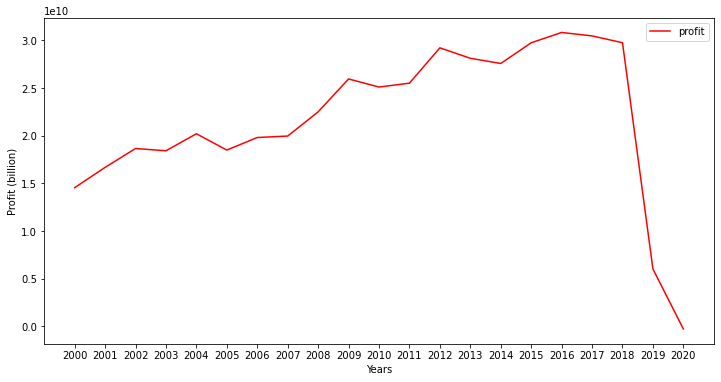

<Figure size 432x288 with 0 Axes>

In [46]:
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
gross
plt.figure(figsize = (12, 6))

#plt.plot(years, st_plot_1, label = "Domestic Gross") # line 1
#plt.plot(years, st_plot_2, label = "Foreign Gross") # line 2
plt.plot(years, gross, label = "profit", color='red')

plt.xlabel("Years")
plt.ylabel("Profit (billion)")
plt.legend() # using legend to differentiate the graphs of companies
#plt.title("Total growth of the Movie Market 2000 - 2020", fontsize=20)
plt.xticks(range(2000, 2021))
plt.show()
plt.savefig("total gross.png");

In [47]:
#best total profit top 10
df5.sort_values(by=['profit'], ascending=False).head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,cpi_%,release_year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09,832.200683,2009
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09,977.115505,2015
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09,1433.786170,1997
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09,908.983227,2018
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09,1070.290925,2015


In [48]:
df5_profit = df5.sort_values(by=['profit'], ascending=False)

In [49]:
df5_profit = df5_profit[0:21]
df5_profit.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,cpi_%,release_year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09,832.200683,2009
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09,977.115505,2015
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09,1433.786170,1997
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09,908.983227,2018
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09,1070.290925,2015


In [50]:
df5_profit['production_budget'].mean()

208171428.57142857

In [51]:
df5_profit['profit'].mean()

1805592178.7619047

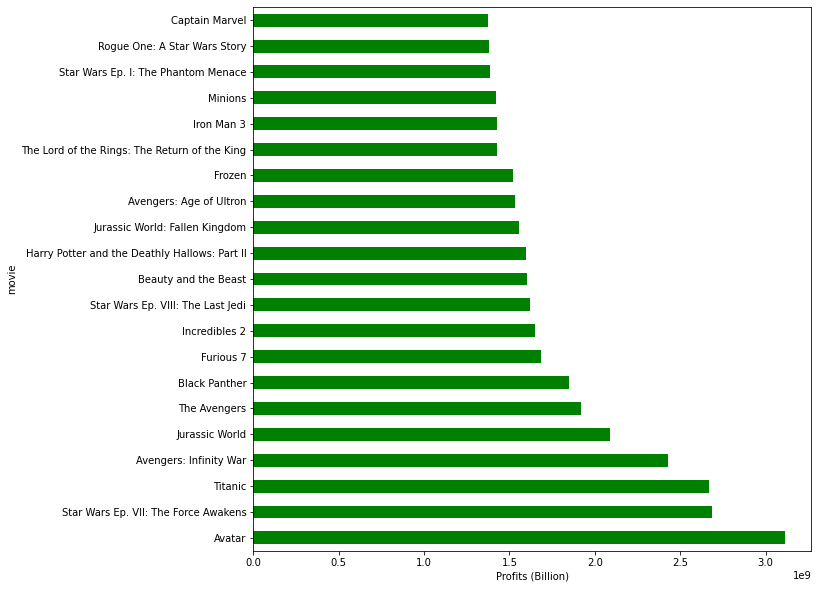

In [52]:
#Visualise the data
df5_profit.plot.barh(x='movie',
                     y='profit', 
                     rot=0,
                     figsize=(10,10),
                     legend=None,
                     color = 'green')
#plt.xticks(rotation=45)
df5_profit.sort_values('profit',inplace=False)
plt.xlabel('Profits (Billion)')
plt.savefig("Movie profits.png");

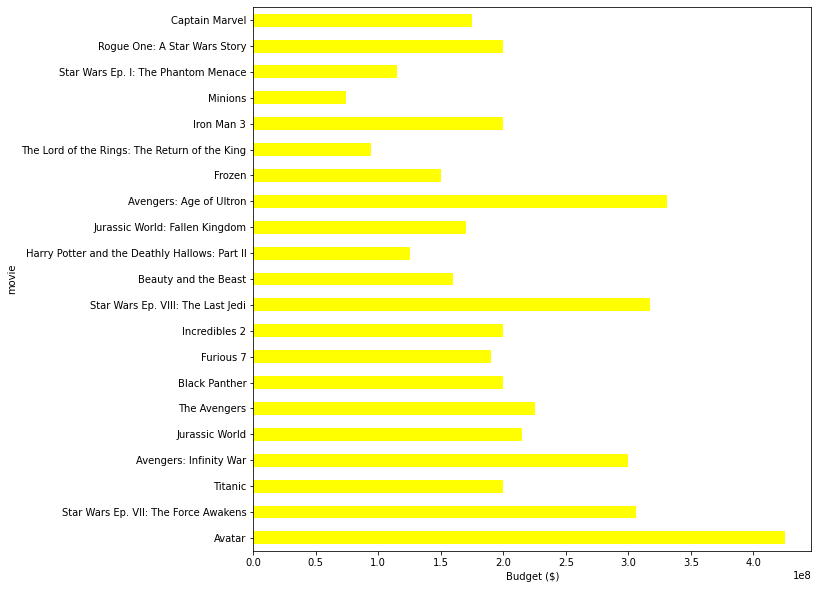

In [53]:
#Visualise the data
df5_profit.plot.barh(x='movie',
                     y='production_budget', 
                     rot=0,
                     figsize=(10,10),
                     legend=None,
                     color = 'yellow')
#plt.xticks(rotation=45)
df5_profit.sort_values('profit',inplace=False)
plt.xlabel('Budget ($)')
plt.savefig("Movie budget.png");

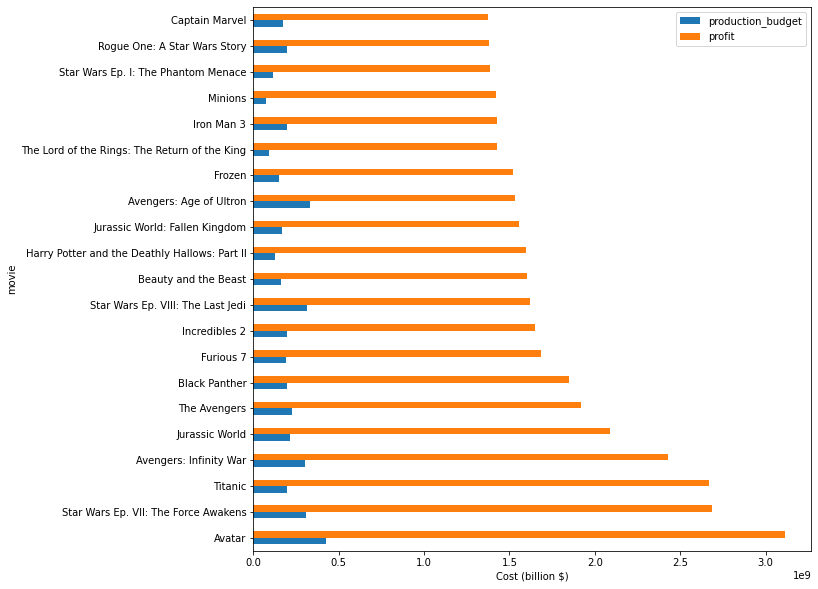

In [54]:
#Visualise the data
df5_profit.plot.barh(x='movie',
                     y={'profit','production_budget'}, 
                     rot=0,
                     figsize=(10,10)
                    )
df5_profit.sort_values('profit',ascending=False)
plt.xlabel('Cost (billion $)')
plt.savefig("Movie budget_2.png");

In [55]:
#import data
df7=pd.read_csv('zippedData/rt.reviews.tsv.gz',encoding='latin-1', sep='\t')
df7

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [59]:
#import data
#didn't use
df8=pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [60]:
#import data
#didn't use
df9=pd.read_csv('zippedData/imdb.name.basics.csv.gz')

In [61]:
#import data
#didn't use
df10=pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df10

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
